In [12]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import nltk
# !pip install transformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Lab 3 aims to practice usage of hugging face and fine tune transformers for classification task.
The dataset is the emotions from hugging face.

https://huggingface.co/datasets/dair-ai/emotion

This lab contains 3 tasks.

#Question 1:

Load in the emotions dataset and provide basic statistics of the dataset. Specifically your code should answer:

1) How many tweets (sentences) was used to train, test and validation?
2) Show 5 samples from the dataset
3) What are the target predict labels?
4) What are the distributions of labels in train, test, and validation (visualize the results using plots)
5) Analyze the words per tweet in the train, test, validation.

1- train data contains 16000 sentences, teat data and validation each of them has 2000 sentences

3- the target label has 6 values: 0(sadness), 1(joy), 2(love), 3(anger) 4(fear) 5(surprise)

4- the distribution of label column in each dataset does not follow the normal distribution and the distribution of them were visulized below

5- Compute summary statistics of the number of tokens per tweet in each dataset using .describe()

In [5]:
# read train, test and validation data
df_train = pd.read_parquet('/content/emotion-train.parquet')
df_test = pd.read_parquet('/content/emotion-test.parquet')
df_val = pd.read_parquet('/content/emotion-validation.parquet')

In [4]:
# print dimension for each data
df_train.shape
df_test.shape
df_val.shape

(16000, 2)

(2000, 2)

(2000, 2)

In [5]:
# Show 5 samples from the dataset
df_train.sample(5)
df_test.sample(5)
df_val.sample(5)

,text,label
10182,i feel as a person and a politician i cannot a...,3
10518,i needed to get all that out of my head and on...,4
15104,i have been feeling pleased with myself for be...,1
10538,i had a hour training class yesterday which wi...,0
13773,im sure most moms have already figured this ou...,1


,text,label
1247,i feel welcomed into the barn like a son comin...,1
1275,i feel so weird and scattered with all wonders...,5
479,i ventured into fabrics amp fabrics on a whim ...,4
1014,im alone in this apartment i get this overwhel...,0
1385,i wanna feel that gorgeous body a yers underne...,1


,text,label
1671,i just finished watching the desendants and yo...,0
18,i also loved that you could really feel the de...,2
36,i constantly feel these fits of discontent,0
1127,i had the feeling that i missed something as c...,0
372,i thought i would i just feel blank,0


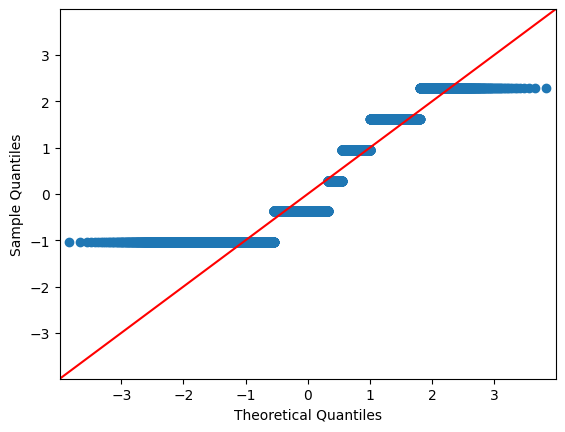

<Axes: >

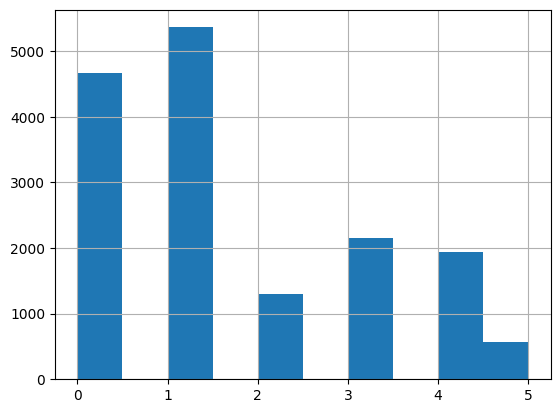

In [6]:
# check normality for label colmun in train data and display the its distribution
fig = sm.qqplot(df_train['label'], line='45', fit = True)
plt.show()
df_train['label'].hist()

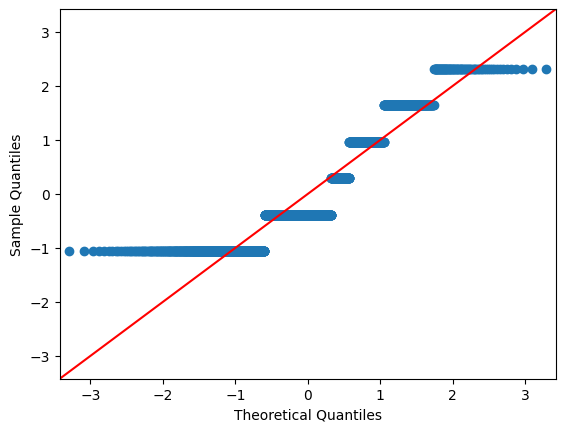

<Axes: >

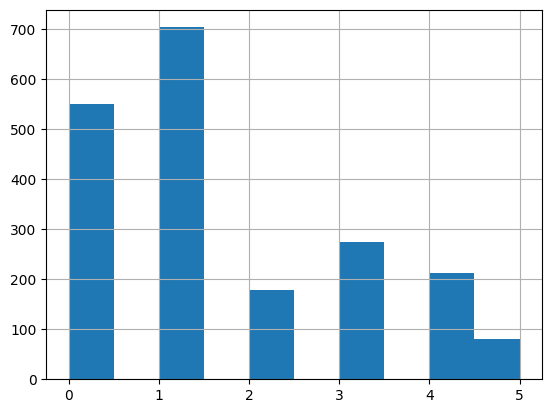

In [7]:
# check normality for label colmun in validation data data and display the its distribution
fig = sm.qqplot(df_val['label'], line='45', fit = True)
plt.show()
df_val['label'].hist()

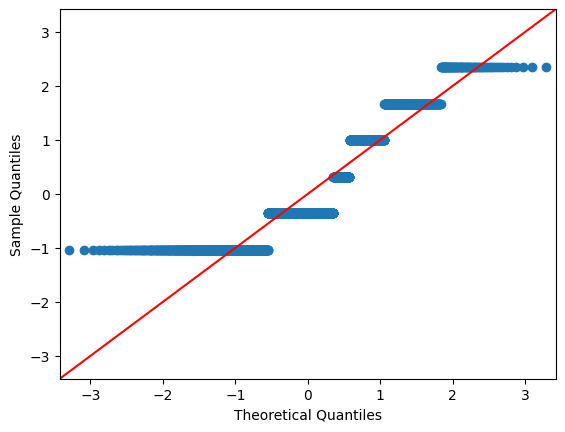

<Axes: >

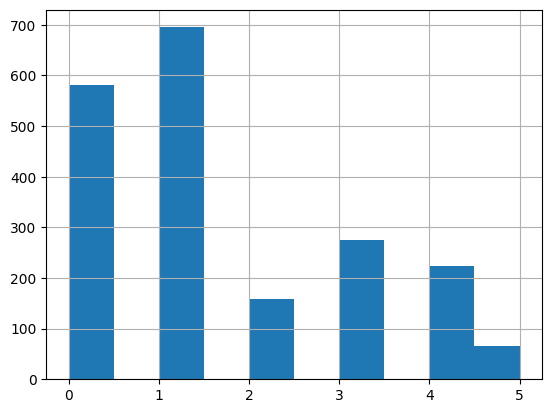

In [8]:
# check normality for label colmun in test data and display the its distribution
fig = sm.qqplot(df_test['label'], line='45', fit = True)
plt.show()
df_test['label'].hist()

In [9]:
# Download the required NLTK resources
nltk.download('punkt')
# Tokenize the tweet texts and count the number of tokens per tweet in train data
df_train['num_tokens'] = df_train['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Compute summary statistics of the number of tokens per tweet in train data
print(df_train['num_tokens'].describe())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

count    16000.000000
mean        19.175313
std         10.992725
min          2.000000
25%         11.000000
50%         17.000000
75%         25.000000
max         66.000000
Name: num_tokens, dtype: float64


In [10]:
# Tokenize the tweet texts and count the number of tokens per tweet in validation data
df_val['num_tokens'] = df_val['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Compute summary statistics of the number of tokens per tweet in validation data
print(df_val['num_tokens'].describe())

count    2000.000000
mean       18.877000
std        10.818058
min         2.000000
25%        10.000000
50%        17.000000
75%        25.000000
max        61.000000
Name: num_tokens, dtype: float64


In [12]:
# Tokenize the tweet texts and count the number of tokens per tweet in test data
df_test['num_tokens'] = df_test['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Compute summary statistics of the number of tokens per tweet in test data
print(df_test['num_tokens'].describe())

count    2000.000000
mean       19.161000
std        11.015432
min         3.000000
25%        10.750000
50%        17.000000
75%        26.000000
max        61.000000
Name: num_tokens, dtype: float64


In [ ]:
# put your code for Q1 here, you can have multiple code blocks.

Summarize your answers to Q1 below, based on your analysis:


# Question 2:

Tokenization. Use two different tokenization models provided by hugging face.

For instance:
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

For each tokenizer:

Report the tokenizer's vocabulary size.

Present the tokenization results for the two selected tokenizers on three examples.



I used (distilbert-base-uncased) and (bert-base-uncased) as a two different tokenizers and the vocaublulary size for each tokenizer is 30522

the tokenization result(tokens and token ID) were presented below

In [5]:
# Define two tokenization models
model_1 = 'distilbert-base-uncased'
model_2 = 'bert-base-uncased'
tokenizer_1 = AutoTokenizer.from_pretrained(model_1)
tokenizer_2 = AutoTokenizer.from_pretrained(model_2)

In [6]:
# Tokenize the tweet texts using the first model
df_train['tokens_1'] = df_train['text'].apply(lambda x: tokenizer_1.tokenize(x))

# Tokenize the tweet texts using the second model
df_train['tokens_2'] = df_train['text'].apply(lambda x: tokenizer_2.tokenize(x))

In [8]:
# print the vocabulary size for the first tokenizer (distilbert-base-uncased)
tokenizer_1.vocab_size

30522

In [9]:
# print the vocabulary size for the first tokenizer (bert-base-uncased)
tokenizer_2.vocab_size

30522

In [12]:
# present the tokens and tokens ID for the first examples on the train data
example_texts = df_train['text'][:3]

for  i,text in enumerate(example_texts):
      tokens_1 = tokenizer_1.encode(text, add_special_tokens=False)
      tokens_2 = tokenizer_2.encode(text, add_special_tokens=False)
      print(df_train['tokens_1'][i][:])
      print(tokens_1)
      print(df_train['tokens_2'][i][:])
      print(tokens_2)

['i', 'didn', '##t', 'feel', 'humiliated']
[1045, 2134, 2102, 2514, 26608]
['i', 'didn', '##t', 'feel', 'humiliated']
[1045, 2134, 2102, 2514, 26608]
['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned', 'hopeful', 'just', 'from', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is', 'awake']
[1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300]
['i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned', 'hopeful', 'just', 'from', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is', 'awake']
[1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300]
['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong']
[10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308]
['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong']
[10047, 9775, 1037, 3

# Question 3:

Use one pretrained model offered by Huggingface, e.g., 'distilbert-base-uncased' to train a emotion classification model from train and report their performances on the validation dataset, in terms of accuracy, F1 score, precision and recall.

In [10]:
# Define the model and tokenizer
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)

# Tokenize the training and validation data
train_encodings = tokenizer(df_train['text'].tolist(), truncation=True, padding=True)
val_encodings = tokenizer(df_val['text'].tolist(), truncation=True, padding=True)

# Convert the encodings to TensorFlow Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    df_train['label']
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    df_val['label']
))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [28]:
metrics = [
    tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.SparseCategoricalCrossentropy(name='loss'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

In [17]:
# Compile the model with the Adam optimizer and the evaluation metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=metrics
)

In [29]:
# Train the model for 3 epochs using a batch size of 32
history = model.fit(
    train_dataset.shuffle(len(df_train)).batch(32),
    validation_data=val_dataset.batch(32),
    epochs=3,
    batch_size=32
)

Epoch 1/3
500/500 [==============================] - 143s 286ms/step - loss: 0.1446 - accuracy: 0.9589 - val_loss: 0.2592 - val_accuracy: 0.9300
Epoch 2/3
500/500 [==============================] - 141s 282ms/step - loss: 0.1327 - accuracy: 0.9671 - val_loss: 0.2158 - val_accuracy: 0.9330
Epoch 3/3
500/500 [==============================] - 140s 280ms/step - loss: 0.1237 - accuracy: 0.9769 - val_loss: 0.2184 - val_accuracy: 0.9380


In [45]:
# Evaluate the model on the validation set

val_pred = tf.argmax(model.predict(val_dataset.batch(32)).logits, axis=1)
val_true = df_val['label']
val_acc = accuracy_score(val_true, val_pred)
val_precision = precision_score(val_true, val_pred, average='weighted')
val_recall = recall_score(val_true, val_pred, average='weighted')

63/63 [==============================] - 5s 79ms/step


In [46]:
print(val_acc)
print(val_precision)
print(val_recall)

0.938
0.9386562380957265
0.938
